In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

## Data Preparation 

In [2]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [3]:
validation_set = image_dataset_from_directory(
    "./val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
INPUT_SHAPE = (224, 224, 3)

In [6]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [9]:
model.add(mobnet)

In [10]:
model.add(tf.keras.layers.Dense(units = 4,activation="softmax"))

In [11]:
import tensorflow as tf

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + 1e-8))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


In [12]:
metrics_list = ["accuracy", F1Score()]

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
 128/2392 [>.............................] - ETA: 7:32 - loss: 0.0481 - accuracy: 0.9922 - f1_score: 0.9922

In [16]:
model.save("Trained_Model.h5")

In [17]:
training_history.history

{'loss': [1.119071364402771,
  0.8211103081703186,
  0.6206779479980469,
  0.47978582978248596,
  0.37626126408576965,
  0.29231613874435425,
  0.23392130434513092,
  0.1852831244468689,
  0.14899900555610657,
  0.11974213272333145,
  0.10221175849437714,
  0.08464270830154419,
  0.07491603493690491,
  0.06571270525455475,
  0.058911632746458054],
 'accuracy': [0.8779847025871277,
  0.8958635330200195,
  0.9344573020935059,
  0.9582304358482361,
  0.9619944095611572,
  0.9686989188194275,
  0.9710122346878052,
  0.9753904342651367,
  0.9785662889480591,
  0.982813835144043,
  0.9839247465133667,
  0.9868653416633606,
  0.9876625537872314,
  0.9889695048332214,
  0.9899365901947021],
 'f1_score': [0.0,
  0.5617142915725708,
  0.8696550130844116,
  0.8767958879470825,
  0.9315666556358337,
  0.9598652124404907,
  0.9710677266120911,
  0.97517991065979,
  0.9785687923431396,
  0.9828253388404846,
  0.9838222861289978,
  0.9867929220199585,
  0.9876038432121277,
  0.9889985918998718,
  0.9

In [18]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [19]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'loss': [1.119071364402771,
  0.8211103081703186,
  0.6206779479980469,
  0.47978582978248596,
  0.37626126408576965,
  0.29231613874435425,
  0.23392130434513092,
  0.1852831244468689,
  0.14899900555610657,
  0.11974213272333145,
  0.10221175849437714,
  0.08464270830154419,
  0.07491603493690491,
  0.06571270525455475,
  0.058911632746458054],
 'accuracy': [0.8779847025871277,
  0.8958635330200195,
  0.9344573020935059,
  0.9582304358482361,
  0.9619944095611572,
  0.9686989188194275,
  0.9710122346878052,
  0.9753904342651367,
  0.9785662889480591,
  0.982813835144043,
  0.9839247465133667,
  0.9868653416633606,
  0.9876625537872314,
  0.9889695048332214,
  0.9899365901947021],
 'f1_score': [0.0,
  0.5617142915725708,
  0.8696550130844116,
  0.8767958879470825,
  0.9315666556358337,
  0.9598652124404907,
  0.9710677266120911,
  0.97517991065979,
  0.9785687923431396,
  0.9828253388404846,
  0.9838222861289978,
  0.9867929220199585,
  0.9876038432121277,
  0.9889985918998718,
  0.9

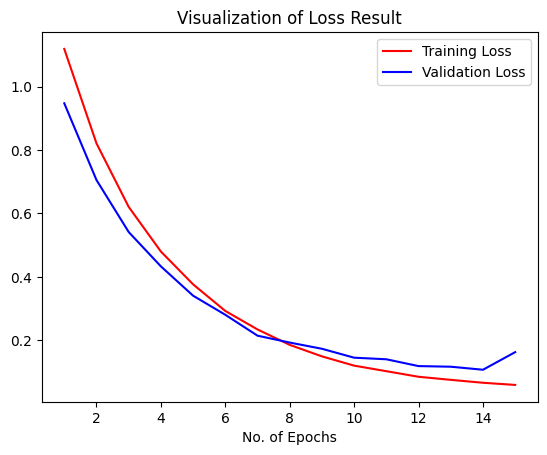

In [20]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [22]:
test_set = validation_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [23]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

171/171 [==============================] - 32s 178ms/step - loss: 0.1608 - accuracy: 0.9562 - f1_score: 0.9564


In [24]:
test_loss

0.16075611114501953

In [25]:
test_acc

0.9561876654624939

In [26]:
f1_score

0.9564340710639954

## Model Evaluation

In [27]:
test_set = validation_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [28]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [30]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [31]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

171/171 [==============================] - 18s 95ms/step


In [32]:
predicted_categories

array([[0.98502916, 0.00425455, 0.00625894, 0.00445738],
       [0.9849437 , 0.00428352, 0.006291  , 0.00448174],
       [0.98485225, 0.00433212, 0.00631073, 0.00450498],
       ...,
       [0.00289044, 0.00368483, 0.00538915, 0.9880356 ],
       [0.00289044, 0.00368483, 0.00538915, 0.9880356 ],
       [0.00669597, 0.01064948, 0.01232573, 0.9703288 ]], dtype=float32)

In [33]:
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

### 1. Classification Report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3746
           1       0.81      0.98      0.89      1161
           2       0.90      0.86      0.88       887
           3       0.99      0.96      0.98      5139

    accuracy                           0.96     10933
   macro avg       0.92      0.94      0.93     10933
weighted avg       0.96      0.96      0.96     10933



### 2. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3600,   76,   61,    9],
       [   9, 1141,    0,   11],
       [  62,   21,  763,   41],
       [   3,  165,   21, 4950]], dtype=int64)

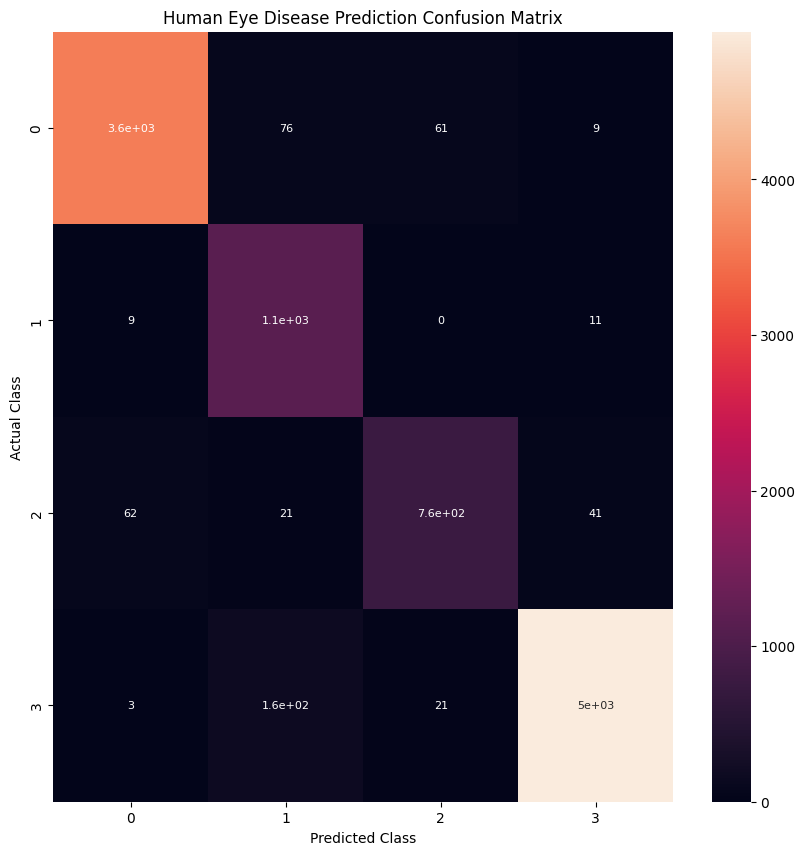

In [36]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()

In [37]:
model.save("Trained_Model.h5", include_optimizer=False)


In [38]:
model.save("Trained_Model.keras")
